<a href="https://colab.research.google.com/github/pradeep1018/Art-Classifier/blob/main/art_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ART CLASSIFIER**

This is an image classification model that classifies art images. The model is trained to handle 5 different types of arts i.e drawings, engraving, iconography, painting and sculpture. I have used deep learning to predict the images. The neural network used is primarily a Convolutional Neural Network(CNN). Multiple convolutions are performed along with other techniques like pooling and dropouts. The code is completely written in Python and different libraries of Python are used. The layers of CNN is defined using a deep learning library Keras built upon Tensorflow. Libraries like Numpy, Pandas, Matplotlib are used to work with the data. 

Have a look through the notebook to understand the code. Each part of the code is well defined for your understanding.

In [ ]:
# mounting google drive to access the files
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


Google drive is mounted to access the training and test images and to upload the results as a submission.csv file

In [ ]:
#importing essential packages
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as mpclr
import pandas as pd
import PIL.Image

# open training and test directories
training_dir = ""
test_dir = ""

#defining the classes as a list
arts = ["drawings","engraving","iconography","painting","sculpture"]

# assigning labels to corresponding labels
arts_dict = {0:"drawings",1:"engraving",2:"iconography",3:"painting",4:"sculpture"}
print(arts_dict)

# iterating through the folders of training directory and counting the numbers of images in each  class
for art in arts:  
    path = os.path.join(training_dir,art) 
    print("number of ",art," images: ",len(os.listdir(path)))

# printing number of images in
print(len(os.listdir(test_dir)))

{0: 'drawings', 1: 'engraving', 2: 'iconography', 3: 'painting', 4: 'sculpture'}
number of  drawings  images:  1107
number of  engraving  images:  756
number of  iconography  images:  2077
number of  painting  images:  2042
number of  sculpture  images:  1738
798


images of  drawings


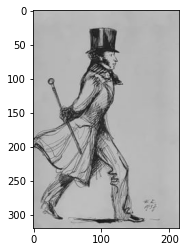

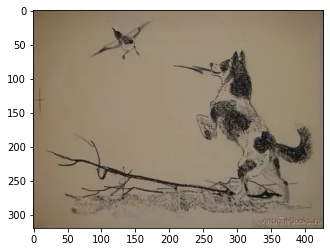

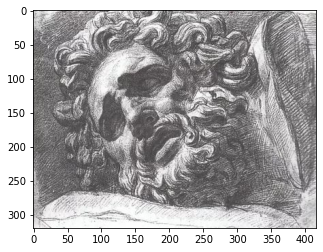

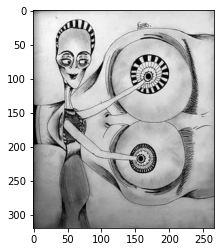

images of  engraving


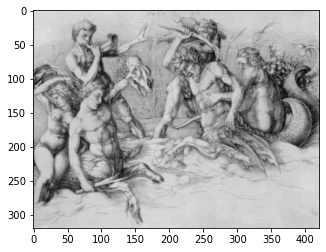

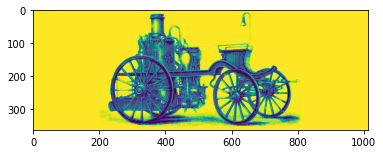

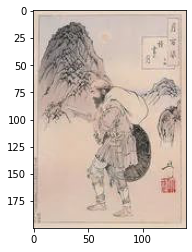

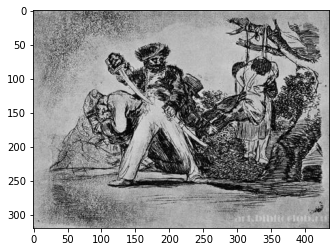

images of  iconography


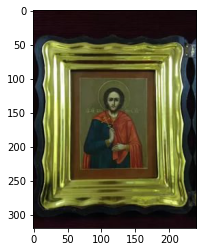

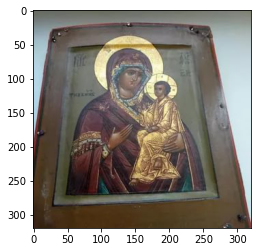

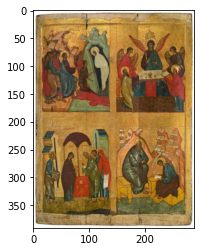

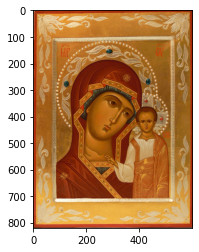

images of  painting


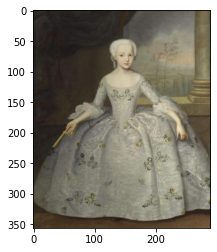

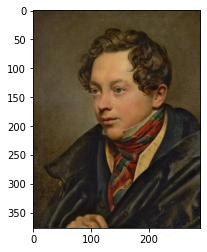

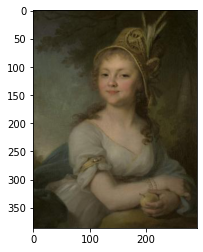

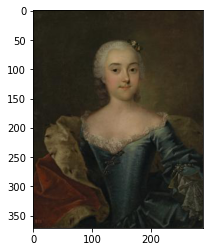

images of  sculpture


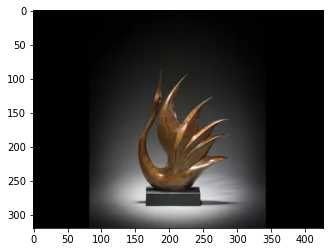

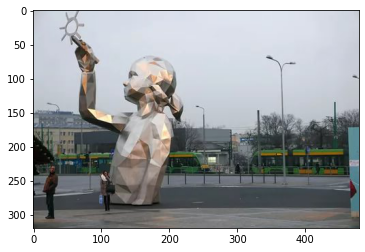

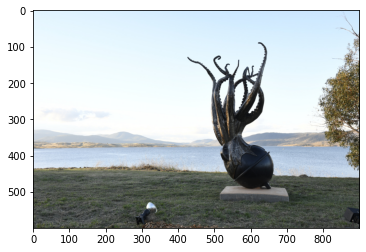

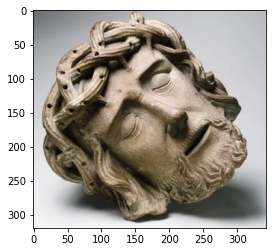

In [ ]:
for art in arts:  
    path = os.path.join(training_dir,art)
    print("images of ",art)
    for filename in os.listdir(path)[0:4]:
      imgpath = os.path.join(path,filename)
      img = mpimg.imread(imgpath)
      imgplt = plt.imshow(img)
      plt.show()

I have imported various packages for data analysis and data manipulation. I used os package to open and explore the test and train directories. There are 1107 drawings images, 756 engraving images, 2077 iconography images, 2042 painitng images and 1738 sculpture images in the training directory and 798 images in the test directory.

In [ ]:
#importing our deep learning framework
import tensorflow as tf 

#defining the layers of neural network
model = tf.keras.models.Sequential([ 
                                    
    #first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 4)),
    #second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #first maxpooling
    tf.keras.layers.MaxPooling2D(2, 2),

    #third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #second maxpooling
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(), 

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.20),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.20),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

#compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      2368      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0

I used Keras library to built the layers of my neural networks because of the high level abstraction it provides. I used 4 convolution layers and 5 fully defined layers to complete my neural network. I used maxpooling to extract the important features. I used dropout as well. I used softmax function as the activation function in the last layer because we are building a multi class classifier. The loss function and optimizer I used are categorical crossentropy and rms prop. I didn't set the learning rate to any particular value because my training was already slow due to multiple layers.

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

# imagedatagenerator to generate skewed data
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=90,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# passing the images from training directory 
train_generator = training_datagen.flow_from_directory(
	training_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=64,
  color_mode="rgba"
)

Found 7720 images belonging to 5 classes.


I used imagedatagenerator function from Keras to rotate and position the images at different positions so that the model is good enough to classify skewed images. I set the target size of image as (150,150) because the input size of the neural network is (150,150). I used color_mode as rgba so that the model is able to differentiate opaque and transparent images. I thought opacity could be different for two different arts.

In [ ]:
#training the model
history = model.fit(train_generator, epochs=10,steps_per_epoch=10)

Epoch 1/10
10/10 [==============================] - 208s 21s/step - loss: 2.9107 - accuracy: 0.2175
Epoch 2/10
10/10 [==============================] - 195s 19s/step - loss: 1.5542 - accuracy: 0.3187
Epoch 3/10
10/10 [==============================] - 167s 17s/step - loss: 1.4443 - accuracy: 0.3281
Epoch 4/10
10/10 [==============================] - 150s 15s/step - loss: 1.5535 - accuracy: 0.3031
Epoch 5/10
10/10 [==============================] - 132s 13s/step - loss: 1.4540 - accuracy: 0.3750
Epoch 6/10
10/10 [==============================] - 121s 12s/step - loss: 1.4309 - accuracy: 0.4141
Epoch 7/10
10/10 [==============================] - 111s 11s/step - loss: 1.3994 - accuracy: 0.3828
Epoch 8/10
10/10 [==============================] - 99s 10s/step - loss: 1.3992 - accuracy: 0.4484
Epoch 9/10
10/10 [==============================] - 86s 9s/step - loss: 1.5220 - accuracy: 0.4000
Epoch 10/10
10/10 [==============================] - 86s 9s/step - loss: 1.2477 - accuracy: 0.5344


Now the model is trained for 10 epochs. I didn't use validation data because less images were available. It takes a lot of time to train due to multiple layers in the neural network

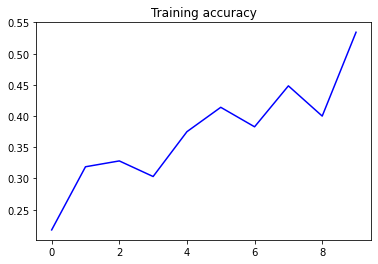

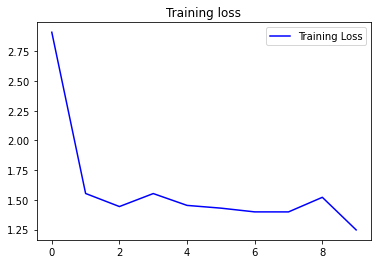

In [ ]:

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

#plotting graph for training accuracy
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

#plotting graph for training loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

I have plotted the progress of training on a graph using matplotlib. I achieved training accuracy around 53%.

In [ ]:
id=[]
label = []
art_count = [0,0,0,0,0]
# opening the test directory
test_data = pd.read_csv('')

#iterating through the images in test directory and predicting the class
for index in test_data.index:
  test_image = test_data['id'][index]
  rgb_image = PIL.Image.open(os.path.join(test_dir,test_image))
  rgba_image = rgb_image.convert('RGBA')
  rgba_image = rgba_image.resize((150,150))
  image = np.array(rgba_image)
  image = np.expand_dims(image, axis = 0)
  pred = model.predict(image)
  id.append(test_image)
  label.append(arts_dict[np.argmax(pred)])
  art_count[np.argmax(pred)]+=1

print(id)
print(label)
print(art_count)

['330.jpg', '1442.jpg', 'i - 1361.jpeg', '0009.jpg', '305.jpg', 'i - 586.jpeg', '1472.jpg', '0623.jpg', 'i - 308.jpeg', '4587_mainfoto_05.jpg', '198.png', 'i - 6.jpeg', '2030.jpg', 'i - 534 20.26.19.jpeg', 'i - 767.jpeg', 'i - 553.jpeg', '1129.jpg', 'i - 454.jpeg', 'i - 1301.jpeg', '1319.jpg', '1389.jpg', 'i - 572.jpeg', 'i - 1398.jpeg', '0496.jpg', 'i - 1004.jpeg', 'i - 836.jpeg', '302.jpg', 'i - 1190.jpeg', '2669_mainfoto_05.jpg', 'i - 1302.jpeg', 'i - 89.jpeg', '0789.jpg', 'i - 482.jpeg', 'i - 1098.jpeg', 'i - 1448.jpeg', 'i - 730.jpeg', '2337.jpg', '0940.jpg', '327.jpg', 'i - 779.jpeg', '203.jpg', 'i - 515.jpeg', '2112.jpg', 'i - 1389.jpeg', 'i - 959.jpeg', '2311.jpg', 'i - 626.jpeg', '0749.jpg', '146 18.59.20.jpg', 'i - 134.jpeg', '0474.jpg', 'i - 148.jpeg', '1677.jpg', '1522.jpg', 'i - 259.jpeg', '1682.jpg', 'i - 1353.jpeg', '0855.jpg', 'i - 321.jpeg', '2264.jpg', 'i - 795.jpeg', 'i - 746.jpeg', 'i - 464.jpeg', 'i - 778 20.26.19.jpeg', 'i - 1233.jpeg', '1327.jpg', '652.jpg', '054

Now I traversed through all the images in test directory and predicted the class of each image. I displayed the number of images that come under each category. According to my model, all images belong to drawings.

In [ ]:
#defining a dictionary of image names and their respective classes
dict = {'id': id, 'label': label}  
df = pd.DataFrame(dict) 
#uploading the results to submission file
df.to_csv('', index = False) 

I have uploaded the results in the submission file using pandas. 